In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Step 2: Load the dataset
file_path = '/Users/parmikenia/Desktop/internship codes/combined_credit.csv'
df = pd.read_csv(file_path)

In [3]:
# Step 3: Display the first few rows of the dataframe
df.head()

,Customer_ID,gender,Age,demographics,profession,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Utility_Payments_On_Time,Mobile_Phone_Payment_On_Time,social mediaplatform,Social_Media_Activity_Score,Transaction_Behavior_Score,Credit_Score
0,1,male,60,Urban,Software Engineer,126296,15357,36,964,True,True,Instagram,50,77,402
1,2,female,27,Urban,Student,101182,47136,60,2274,True,True,Facebook,84,24,735
2,3,male,47,Sub_Urban,Marketer Manager,102565,4137,48,1746,True,False,Instagram,16,54,570
3,4,non-binary,67,Urban,Student,49402,1097,60,1130,True,True,Instagram,76,26,406
4,5,male,35,Urban,Software Engineer,24263,12407,48,1324,True,True,Instagram,77,66,371


In [4]:
# Check the shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Display basic information about the dataframe
df.info()

# Summary statistics for numerical columns
df.describe()

The dataset has 1000 rows and 15 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Customer_ID                   1000 non-null   int64 
 1   gender                        1000 non-null   object
 2   Age                           1000 non-null   int64 
 3   demographics                  1000 non-null   object
 4   profession                    1000 non-null   object
 5   Income                        1000 non-null   int64 
 6   Loan_Amount                   1000 non-null   int64 
 7   Loan_Term_Months              1000 non-null   int64 
 8   Rent_Payments                 1000 non-null   int64 
 9   Utility_Payments_On_Time      1000 non-null   bool  
 10  Mobile_Phone_Payment_On_Time  1000 non-null   bool  
 11  social mediaplatform          1000 non-null   object
 12  Social_Media_Activity_Score   1000 

,Customer_ID,Age,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Social_Media_Activity_Score,Transaction_Behavior_Score,Credit_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,42.993000,85596.120000,24152.547000,35.988000,1499.48000,50.358000,50.228000,563.991000
std,288.819436,14.841605,37918.028486,14043.993452,16.949311,572.74052,28.961537,28.090053,160.508436
min,1.000000,18.000000,20060.000000,1097.000000,12.000000,504.00000,1.000000,1.000000,300.000000
25%,250.750000,30.000000,52358.750000,12070.250000,24.000000,1001.25000,24.000000,26.000000,423.750000
50%,500.500000,42.000000,85651.000000,23055.000000,36.000000,1479.00000,50.000000,51.000000,553.000000
75%,750.250000,56.000000,118547.250000,35730.250000,48.000000,1972.25000,76.000000,74.000000,701.250000
max,1000.000000,69.000000,149972.000000,49980.000000,60.000000,2498.00000,99.000000,99.000000,849.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

Customer_ID                     0
gender                          0
Age                             0
demographics                    0
profession                      0
Income                          0
Loan_Amount                     0
Loan_Term_Months                0
Rent_Payments                   0
Utility_Payments_On_Time        0
Mobile_Phone_Payment_On_Time    0
social mediaplatform            0
Social_Media_Activity_Score     0
Transaction_Behavior_Score      0
Credit_Score                    0
dtype: int64


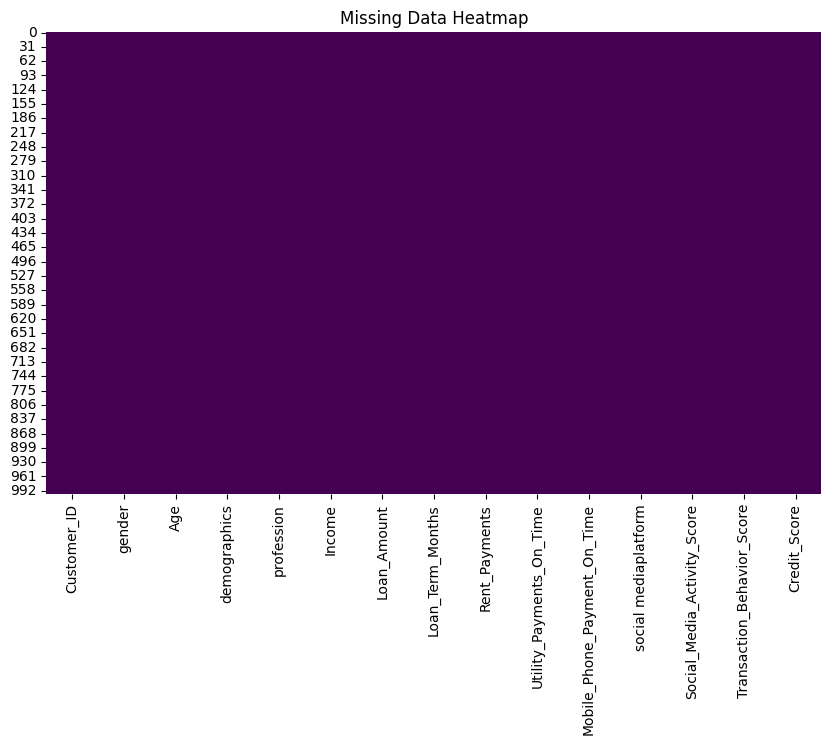

In [6]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [7]:
# Drop columns with too many missing values
missing_threshold = 0.5
df = df[df.columns[df.isnull().mean() < missing_threshold]]

In [8]:
# Fill missing values for numerical columns with the median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [9]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to binary columns
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

# Apply One-Hot Encoding to categorical columns with more than two categories
df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2])

In [10]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Exclude the 'Age' column from scaling
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('Age', errors='ignore')

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns excluding 'Age'
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
# Display the first few rows of the cleaned dataframe
df.head()

,Customer_ID,Age,Income,Loan_Amount,Loan_Term_Months,Rent_Payments,Utility_Payments_On_Time,Mobile_Phone_Payment_On_Time,Social_Media_Activity_Score,Transaction_Behavior_Score,...,gender_non-binary,demographics_Rural,demographics_Sub_Urban,demographics_Urban,profession_Marketer Manager,profession_Software Engineer,profession_Student,social mediaplatform_Facebook,social mediaplatform_Instagram,social mediaplatform_YouTube
0,-1.730320,60,1.073902,-0.626599,0.000708,-0.935411,True,True,-0.012367,0.953554,...,False,False,False,True,False,True,False,False,True,False
1,-1.726856,27,0.411247,1.637351,1.417404,1.352982,True,True,1.162191,-0.934179,...,False,False,False,True,False,False,True,True,False,False
2,-1.723391,47,0.447739,-1.425917,0.709056,0.430637,True,False,-1.186926,0.134350,...,False,False,True,False,True,False,False,False,True,False
3,-1.719927,67,-0.955014,-1.642487,1.417404,-0.645432,True,True,0.885824,-0.862943,...,True,False,False,True,False,False,True,False,True,False
4,-1.716463,35,-1.618328,-0.836758,0.709056,-0.306540,True,True,0.920370,0.561761,...,False,False,False,True,False,True,False,False,True,False


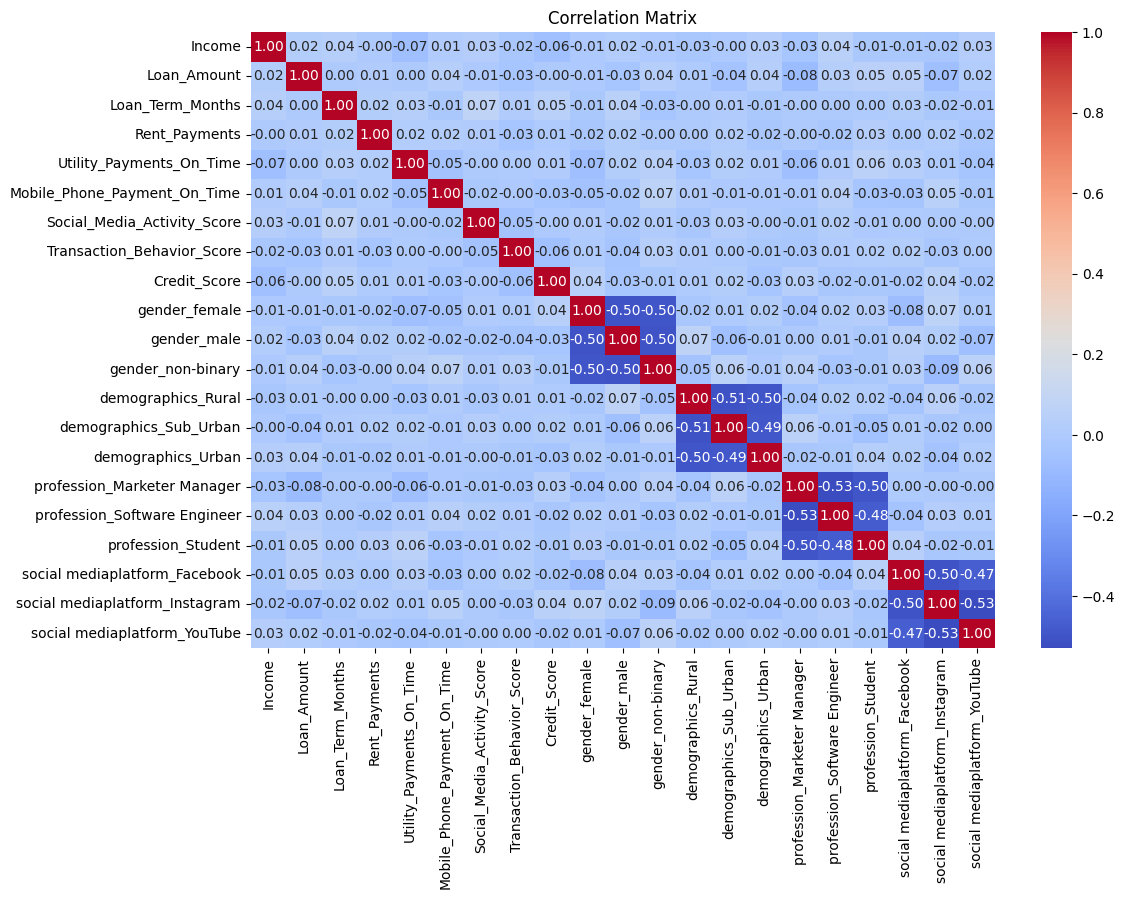

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Age','Customer_ID']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

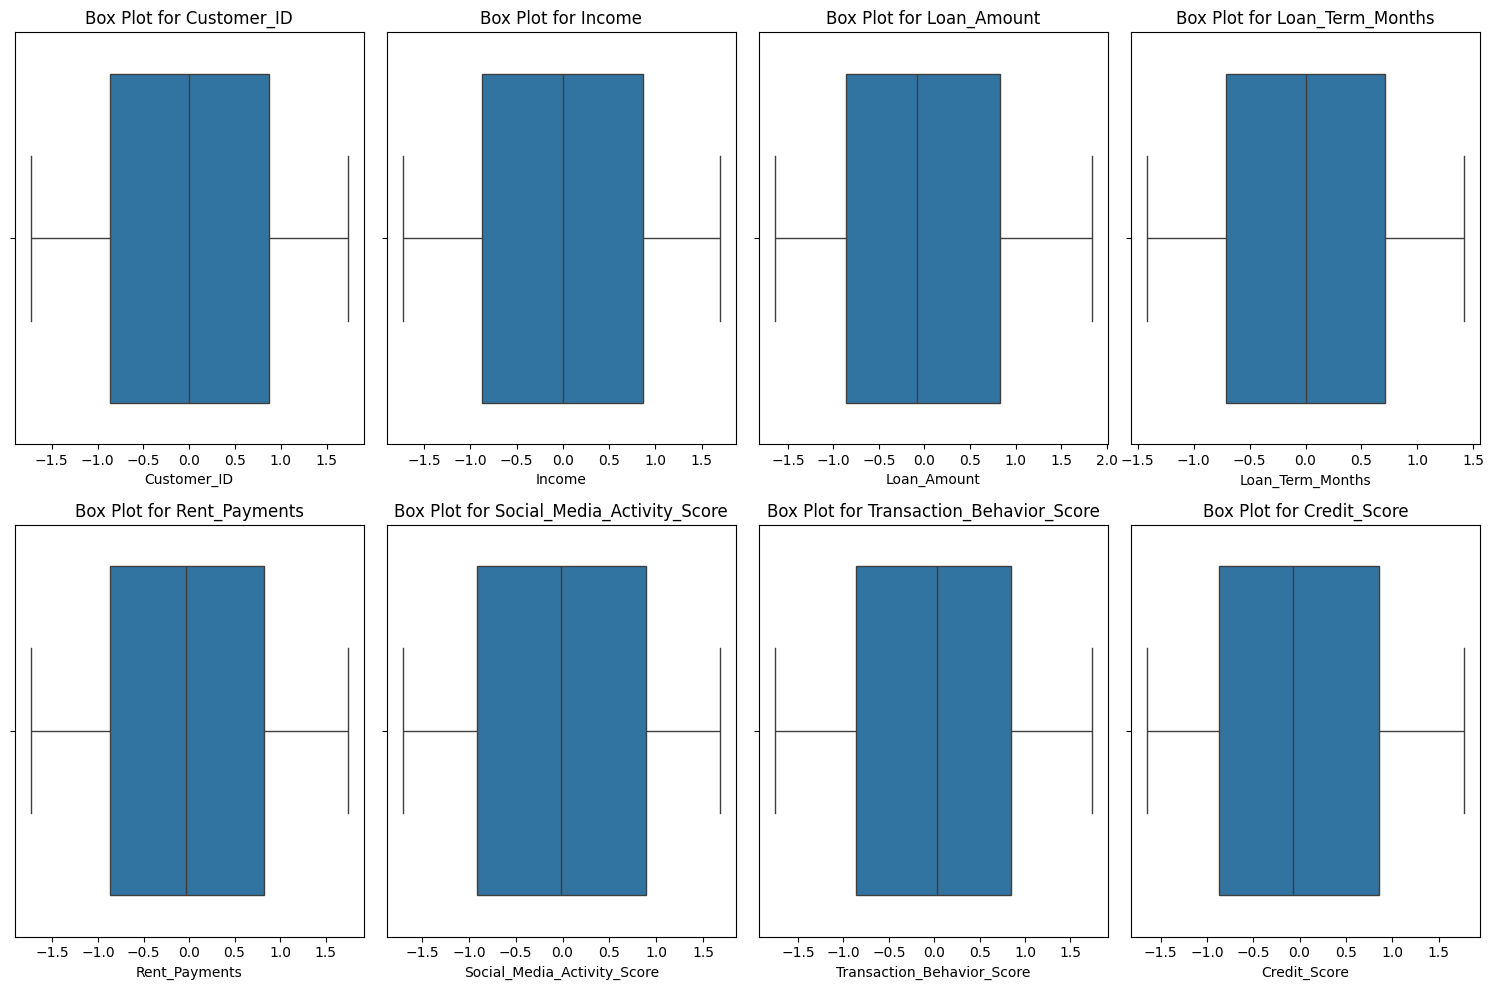

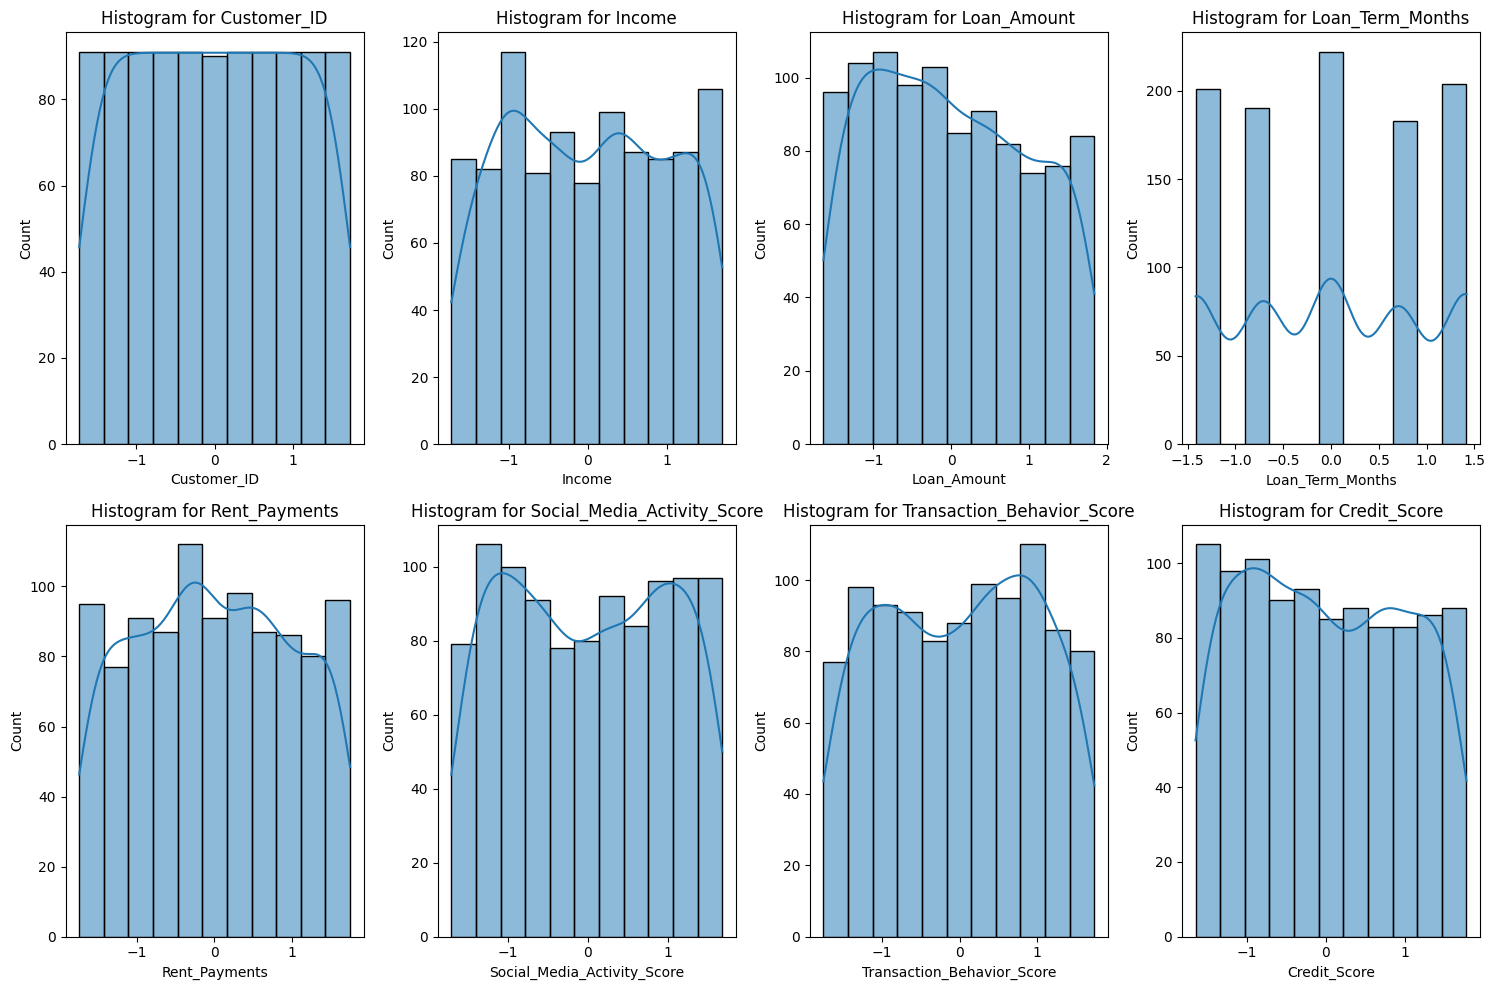

In [13]:
# Visualizing outliers using box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

# Visualizing the distribution of each numerical feature using histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
plt.tight_layout()
plt.show()

In [14]:
# Outlier Detection using Z-Score Method
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_cols]))
z_threshold = 3
outliers = np.where(z_scores > z_threshold)
print(f"Number of outliers detected using Z-score method: {len(outliers[0])}")
df = df[(z_scores < z_threshold).all(axis=1)]
print(f"Dataframe shape after removing outliers using Z-score method: {df.shape}")

# Outlier Detection using IQR Method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))
print(f"Number of outliers detected using IQR method: {outliers_iqr.sum().sum()}")
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]
print(f"Dataframe shape after removing outliers using IQR method: {df.shape}")

Number of outliers detected using Z-score method: 0
Dataframe shape after removing outliers using Z-score method: (1000, 23)
Number of outliers detected using IQR method: 0
Dataframe shape after removing outliers using IQR method: (1000, 23)


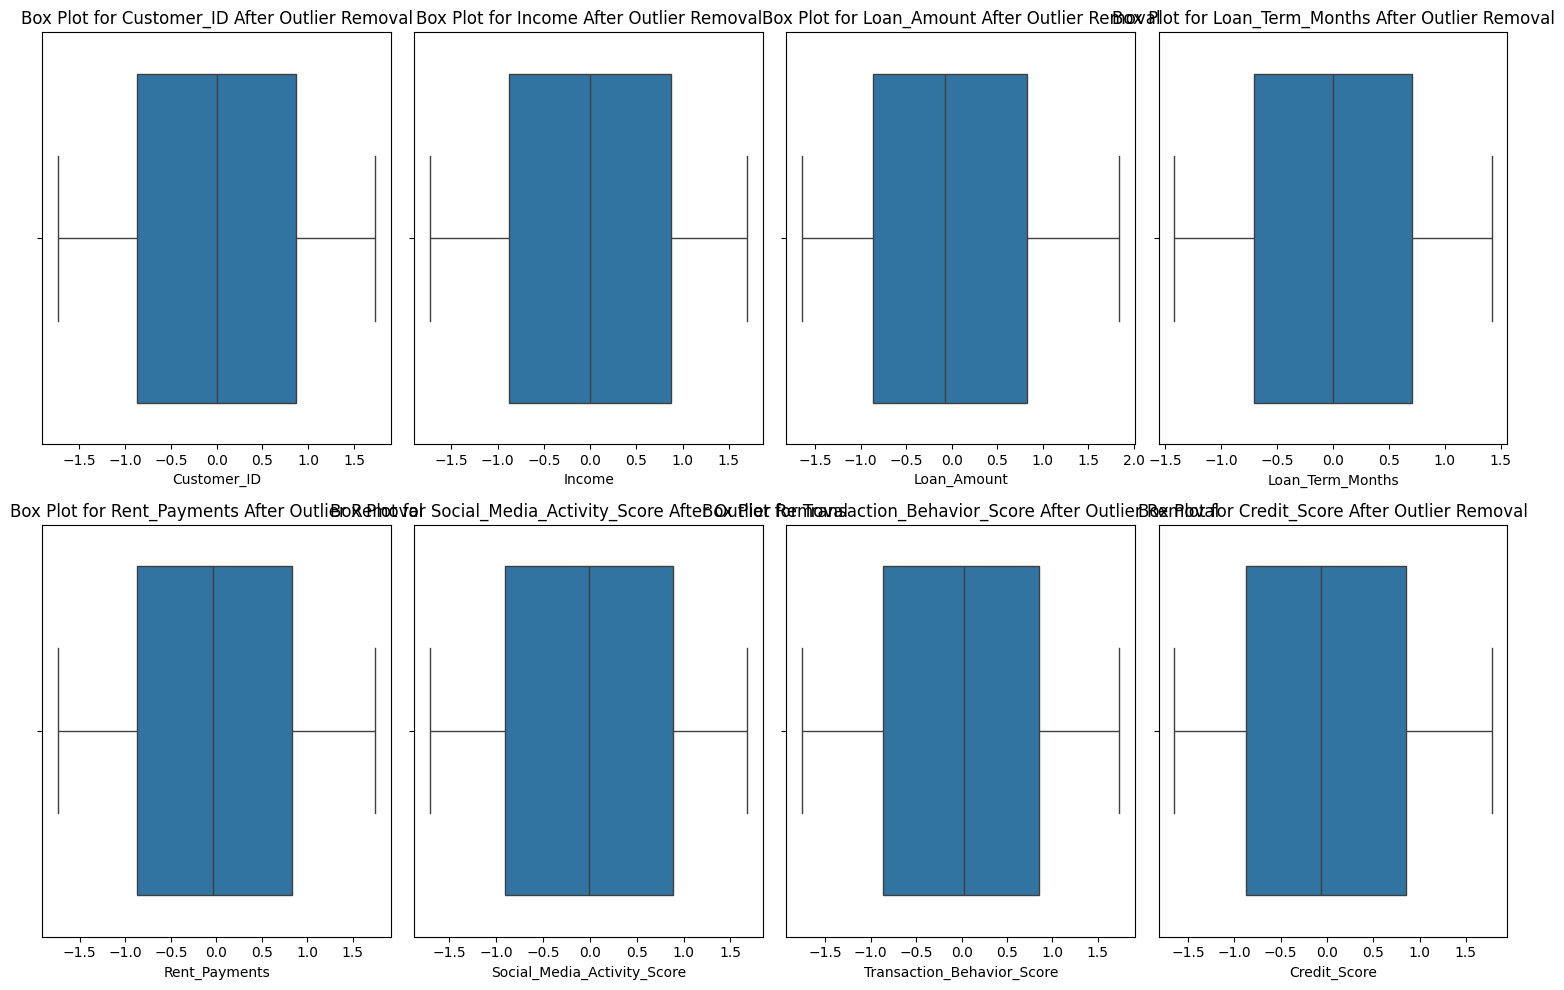

In [15]:
# Review dataset after outlier removal
df.head()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col} After Outlier Removal')
plt.tight_layout()
plt.show()

In [16]:
# Re-initialize numerical columns (since dataframe might have changed after outlier removal)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('Age', errors='ignore')

In [17]:
# Step 8a: Scaling using StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns using StandardScaler excluding 'Age'
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [20]:
# # Display the first few rows of the scaled dataframe
print("Data after scaling with StandardScaler:")
print(df.head())


Data after scaling with StandardScaler:
   Customer_ID  Age    Income  Loan_Amount  Loan_Term_Months  Rent_Payments  \
0    -1.730320   60  1.073902    -0.626599          0.000708      -0.935411   
1    -1.726856   27  0.411247     1.637351          1.417404       1.352982   
2    -1.723391   47  0.447739    -1.425917          0.709056       0.430637   
3    -1.719927   67 -0.955014    -1.642487          1.417404      -0.645432   
4    -1.716463   35 -1.618328    -0.836758          0.709056      -0.306540   

   Utility_Payments_On_Time  Mobile_Phone_Payment_On_Time  \
0                      True                          True   
1                      True                          True   
2                      True                         False   
3                      True                          True   
4                      True                          True   

   Social_Media_Activity_Score  Transaction_Behavior_Score  ...  \
0                    -0.012367                    0

In [21]:
numerical_cols

Index(['Customer_ID', 'Income', 'Loan_Amount', 'Loan_Term_Months',
       'Rent_Payments', 'Social_Media_Activity_Score',
       'Transaction_Behavior_Score', 'Credit_Score'],
      dtype='object')

In [22]:
# Step 8b: Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the numerical columns using MinMaxScaler excluding 'Age'
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the normalized dataframe
print("Data after normalization with MinMaxScaler:")

Data after normalization with MinMaxScaler:


In [23]:
print(df.head())

   Customer_ID  Age    Income  Loan_Amount  Loan_Term_Months  Rent_Payments  \
0     0.000000   60  0.817754     0.291717              0.50       0.230692   
1     0.001001   27  0.624438     0.941820              1.00       0.887663   
2     0.002002   47  0.635084     0.062189              0.75       0.622869   
3     0.003003   67  0.225861     0.000000              1.00       0.313942   
4     0.004004   35  0.032353     0.231369              0.75       0.411234   

   Utility_Payments_On_Time  Mobile_Phone_Payment_On_Time  \
0                      True                          True   
1                      True                          True   
2                      True                         False   
3                      True                          True   
4                      True                          True   

   Social_Media_Activity_Score  Transaction_Behavior_Score  ...  \
0                     0.500000                    0.775510  ...   
1                     0.

In [29]:
# Save the cleaned and preprocessed dataset
df.to_csv('/Users/parmikenia/Desktop/internship codes/combined_credit2.csv', index=False)
print("Cleaned and preprocessed data saved.")

Cleaned and preprocessed data saved.
